In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# from skimage.transform import resize
# import cv2
import os
from preprocess import preprocess_image
import tensorflow as tf
import tqdm

In [2]:
# check gpu
if tf.test.gpu_device_name():
   print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

Default GPU Device: /device:GPU:0


In [3]:
ORIGINAL_SIZE = 424
IMG_SIZE = 128
BATCH_SIZE = 32

In [4]:
data_dir = 'galaxy-zoo-the-galaxy-challenge/images_training_rev1'

In [5]:
for root, dir, fname in os.walk(data_dir):
    print(os.path.join(data_dir, fname[0]))

galaxy-zoo-the-galaxy-challenge/images_training_rev1\100008.jpg


<class 'numpy.ndarray'> (424, 424, 3)


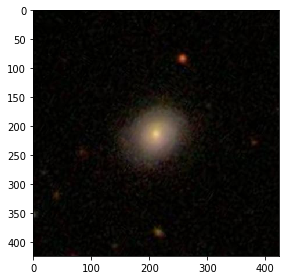

In [6]:
# load sample image
from skimage import io, color
img = io.imread('galaxy-zoo-the-galaxy-challenge/images_training_rev1/100008.jpg')

print(type(img), img.shape)
io.imshow(img)
io.show()

## Load Data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
labels_df = pd.read_csv('galaxy-zoo-the-galaxy-challenge/training_solutions_rev1.csv')

In [9]:
labels_df.set_index('GalaxyID', inplace=True)

In [10]:
labels_df

,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
GalaxyID,,,,,,,,,,,,,,,,,,,,,
100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,0.000000,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.000000,0.000000,0.0,0.325512
100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,0.000000,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.000000,0.000000,0.0,0.000000
100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,0.000000,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.000000,0.000000,0.0,0.000000
100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999948,0.510379,0.489621,0.000000,0.059207,0.430414,0.000000,0.430414,0.226257,0.204157,0.043458,...,0.000000,0.226257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.226257
999950,0.901216,0.098784,0.000000,0.000000,0.098784,0.000000,0.098784,0.000000,0.098784,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
999958,0.202841,0.777376,0.019783,0.116962,0.660414,0.067245,0.593168,0.140022,0.520391,0.000000,...,0.000000,0.000000,0.090673,0.049349,0.000000,0.067726,0.000000,0.000000,0.0,0.072296


In [11]:
# number of classes
labels_df.shape[1]

37

In [12]:
labels_df.index.array.astype(int).astype(str)

array(['100008', '100023', '100053', ..., '999958', '999964', '999967'],
      dtype='<U11')

In [13]:
labels_df.values[:,:]

array([[0.383147  , 0.616853  , 0.        , ..., 0.        , 0.        ,
        0.32551225],
       [0.327001  , 0.663777  , 0.009222  , ..., 0.        , 0.        ,
        0.        ],
       [0.765717  , 0.177352  , 0.056931  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.202841  , 0.777376  , 0.019783  , ..., 0.        , 0.        ,
        0.07229626],
       [0.091     , 0.909     , 0.        , ..., 0.02306456, 0.        ,
        0.04533378],
       [0.767     , 0.14      , 0.093     , ..., 0.        , 0.        ,
        0.02338   ]])

In [14]:
def load_and_preprocess_image(path):
    # img_path = os.path.join(data_dir, path + '.jpg')
    img_path = data_dir + '/' + path + '.jpg'
    image = tf.io.read_file(img_path)
    return preprocess_image(image, image_size=IMG_SIZE)

In [15]:
(X_train, X_test, y_train, y_test) = train_test_split(labels_df.index.astype(int).astype(str),
                                                        labels_df.values[:,:], test_size=0.2, random_state=42)

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((49262,), (12316,), (49262, 37), (12316, 37))

In [17]:
# data_dir + '/' + X_train[0] + '.jpg'
# os.path.join(data_dir, X_train[0] + '.jpg')

## Training Data convet to TF Data

In [18]:
path_ds = tf.data.Dataset.from_tensor_slices(X_train)
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(y_train, tf.float32))
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))

In [19]:
ds = image_label_ds
ds = ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=1000))
ds = ds.batch(BATCH_SIZE)

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.


In [20]:
ds

<BatchDataset shapes: ((None, 128, 128, 3), (None, 37)), types: (tf.float32, tf.float32)>

## Test Data convet to TF Data

In [21]:
path_ds_test = tf.data.Dataset.from_tensor_slices(X_test)
image_ds_test = path_ds_test.map(load_and_preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
label_ds_test = tf.data.Dataset.from_tensor_slices(tf.cast(y_test, tf.float32))
image_label_ds_test = tf.data.Dataset.zip((image_ds_test, label_ds_test))

ds_test = image_label_ds_test
ds_test = ds_test.batch(BATCH_SIZE)

In [22]:
y_test.shape

(12316, 37)

In [23]:
ds

<BatchDataset shapes: ((None, 128, 128, 3), (None, 37)), types: (tf.float32, tf.float32)>

In [24]:
for x, y in ds:
    print(x.shape, y.shape)
    break

(32, 128, 128, 3) (32, 37)


## Model

In [40]:
from tensorflow.keras import models, layers, regularizers, optimizers
from cnn import SimpleCNN
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

In [26]:
cnn_model = SimpleCNN(img_size=IMG_SIZE, num_classes=labels_df.shape[1])

In [27]:
cnn_model.input_shape

(None, 128, 128, 3)

In [28]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 128, 128, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        73792     
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [41]:
plot_model(cnn_model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [42]:
def root_mean_square_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [43]:
cnn_model.compile(loss='categorical_crossentropy', 
                    optimizer=optimizers.RMSprop(learning_rate=1e-3), 
                    metrics=['acc', root_mean_square_error])

In [44]:
%%time
history = cnn_model.fit(ds, epochs=10, steps_per_epoch=X_train.shape[0] // BATCH_SIZE, 
                        use_multiprocessing=True,validation_steps=X_test.shape[0] // BATCH_SIZE, validation_data=ds_test)

Epoch 1/10
1539/1539 [==============================] - 48s 28ms/step - loss: 1641275457536.0000 - acc: 0.2802 - root_mean_square_error: 0.2672 - val_loss: 8084497367040.0000 - val_acc: 0.5939 - val_root_mean_square_error: 0.2435
Epoch 2/10
1539/1539 [==============================] - 42s 28ms/step - loss: 67799460347904.0000 - acc: 0.2794 - root_mean_square_error: 0.2674 - val_loss: 183812151574528.0000 - val_acc: 0.5939 - val_root_mean_square_error: 0.2435
Epoch 3/10
1539/1539 [==============================] - 43s 28ms/step - loss: 598478526873600.0000 - acc: 0.2752 - root_mean_square_error: 0.2676 - val_loss: 1231618782003200.0000 - val_acc: 0.5939 - val_root_mean_square_error: 0.2435
Epoch 4/10
1539/1539 [==============================] - 43s 28ms/step - loss: 2704612846993408.0000 - acc: 0.2625 - root_mean_square_error: 0.2687 - val_loss: 4693698637987840.0000 - val_acc: 0.5939 - val_root_mean_square_error: 0.2435
Epoch 5/10
1539/1539 [==============================] - 43s 28ms/s